# CLASE 3.3: PERSONALIZACIÓN Y CONFIGURACIONES ADICIONALES.
---
Vamos a expandir nuestra caja de herramientas de **Matplotlib** añadiendo algunas opciones de personalización importantes para varios de los elementos que constituyen un gráfico, incluyendo leyendas, barras de color y marcas de graduación de ejes. También profundizaremos en algunas configuraciones adicionales que incluyen la creación de figuras con varios paneles que soporten gráficos y la incorporación de texto y anotaciones.

Como siempre, partiremos realizando las correspondientes importaciones que usaremos en esta sección:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from IPython.core.display import HTML

In [3]:
# Setting de parámetros de graficación.
plt.style.use("ggplot") # Template.
plt.rcParams["figure.dpi"] = 120 # Resolución de nuestras figuras.

In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Personalización de leyendas.
Las leyendas de un gráfico otorgan sentido a la visualización de información, asignándole una referencia concreta a varios de sus elementos. Anteriormente, vimos como crear una leyenda sencilla. Pero ahora estudiaremos como personalizar los elementos estructurales y estéticos de una leyenda.

La leyenda, en su versión más sencilla, puede agregarse a un gráfico mediante la función `plt.legend()` en el caso de usar la interfaz de tipo de Matlab, o el método `ax.legend()` si usamos la interfaz orientada a objetos (y ambos aceptan exactamente los mismos argumentos). En ambos casos, automáticamente se crea una leyenda para cualquier objeto del gráfico que posea un rótulo asignado previamente mediante alguna función de graficación, usando el parámetro `label`:

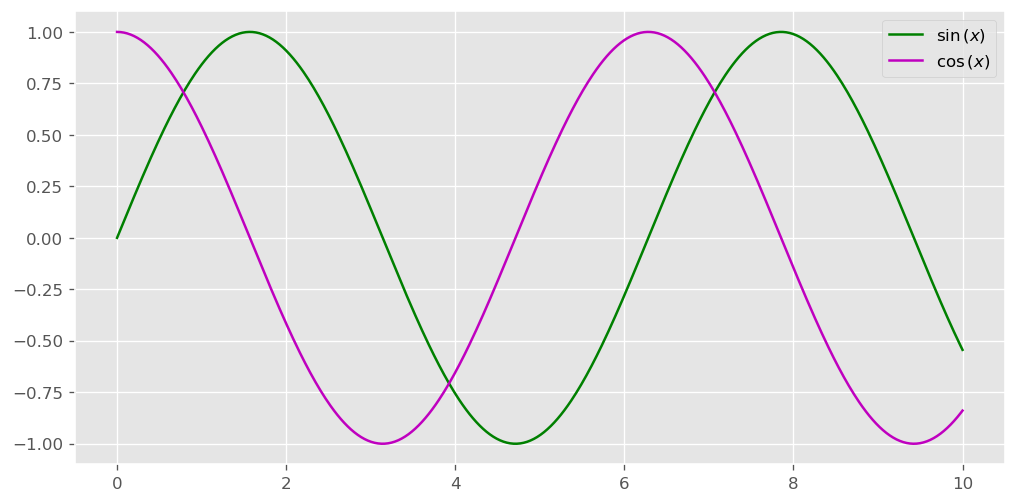

In [5]:
# Partimos creando una secuencia de datos.
x = np.linspace(start=0, stop=10, num=500)

# Construimos un gráfico con leyendas sencillas.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, np.sin(x), "-g", label=r"$\sin{(x)}$")
ax.plot(x, np.cos(x), "-m", label=r"$\cos{(x)}$")
ax.legend();

La leyenda del gráfico anterior cumple con el objetivo de referenciar correctamente qué significa cada una de las líneas que conforman dicho gráfico. Sin embargo, el método `legend()` acepta algunos argumentos adicionales. Uno de ellos es `loc`, que corresponde a un string que permite especificar la localización de la leyenda en el panel correspondiente. Por ejemplo, `loc="upper right"` permitirá ubicar la leyenda en la parte superior derecha del panel; `loc="center down"` ubicará la leyenda en el sector central inferior del gráfico; y `loc="lower left"` ubicará la leyenda en el sector inferior izquierdo del panel.

Otro elemento importante de una leyenda corresponde a la caja en la cual se dibuja la referencia correspondiente de cada gráfico, la que se conoce en la terminología de **Matplotlib** como *"frame"*. De esta manera, podemos diferenciar dicha caja del fondo del gráfico correspondiente mediante el parámetro Booleano `frameon`:

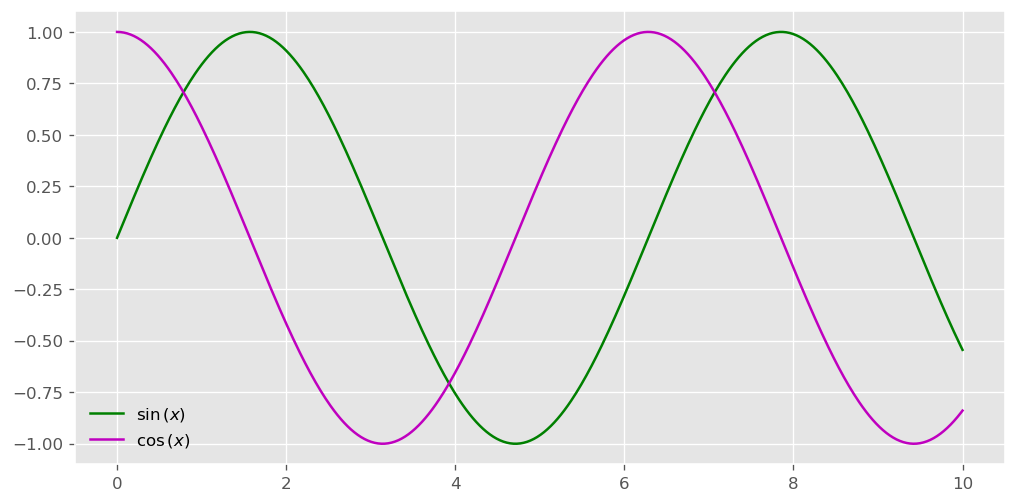

In [6]:
# Manipulamos algunos aspectos relativos a la leyenda.
ax.legend(loc="lower left", frameon=False)
fig

Por cierto, el parámetro `loc` acepta un valor llamado `"best"`, que permite que **Matplotlib** infiera la mejor posición de la leyenda en función de lo que dibujemos conforme cada función de graficación.

Otros parámetros que podemos manipular en el método `legend()` corresponden a `ncol`, que permite definir el número de columnas en las cuales se divide la leyenda; `framealpha`, que permite determinar la transparencia asociada al *frame* donde se dibuja la leyenda (y cuyo valor es de 0 a 1, desde más a menos transparencia); `fancybox`, que nos permite dibujar un *frame* no tan simple como el que está definido por defecto, y que es Booleano; `borderpad`, que es un argumento numérico que corresponde al tamaño del *frame* que contiene a la leyenda; y `shadow`, que es un parámetro Booleano que permite definir si el frame de la leyenda tendrá dibujada una sombra a modo de efecto 3D:

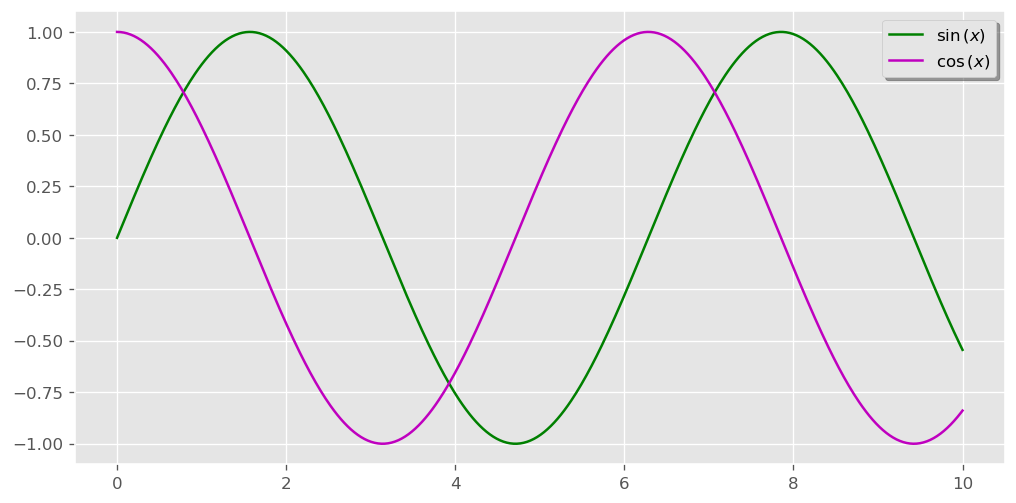

In [7]:
# Manipulamos columnas y el tipo de frame.
ax.legend(loc="best", shadow=True)
fig

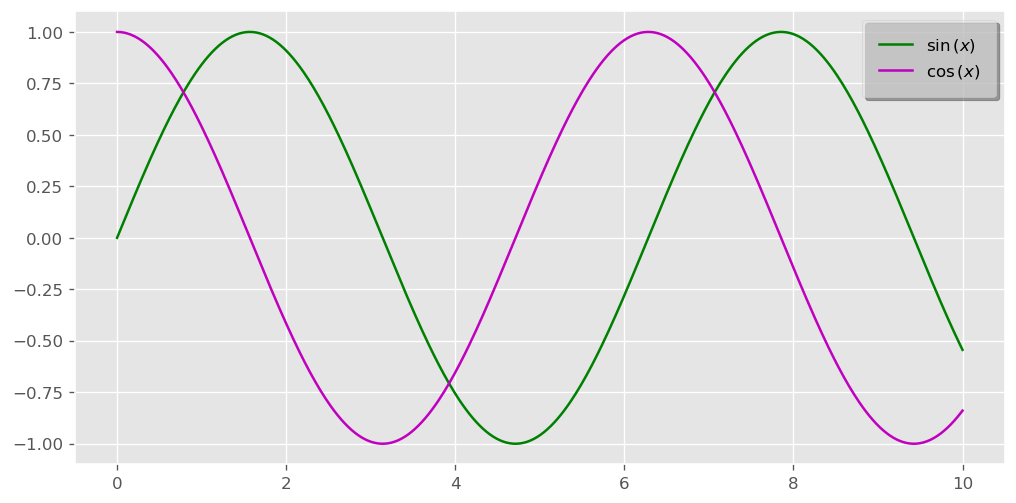

In [8]:
# Manipulamos más elementos de la leyenda.
ax.legend(loc="best", shadow=True, fancybox=True, borderpad=1, framealpha=0.6)
fig

Como ya hemos visto previamente, una leyenda incluye todos los elementos que han sido previamente rotulados en las funciones constructoras de gráficos. Si esto no es lo que queremos, podemos ajustar manualmente cuáles elementos y rótulos aparecerán en nuestro cuadro de leyenda, usando los objetos retornados por las funciones de tipo `ax.plot()`. Por ejemplo, dicha función es capaz de crear múltiples líneas al mismo tiempo, retornando a su vez una lista con las instancias creadas. Si pasamos cualquiera de estas instancias a la función `ax.legend()`, automáticamente le indicará a dicha función qué rótulos identificar:

In [9]:
# Generamos un arreglo con cuatro columnas para probar lo anterior.
y = np.exp(-x.reshape(-1, 1) + 2*np.arange(start=0, stop=2, step=0.5))

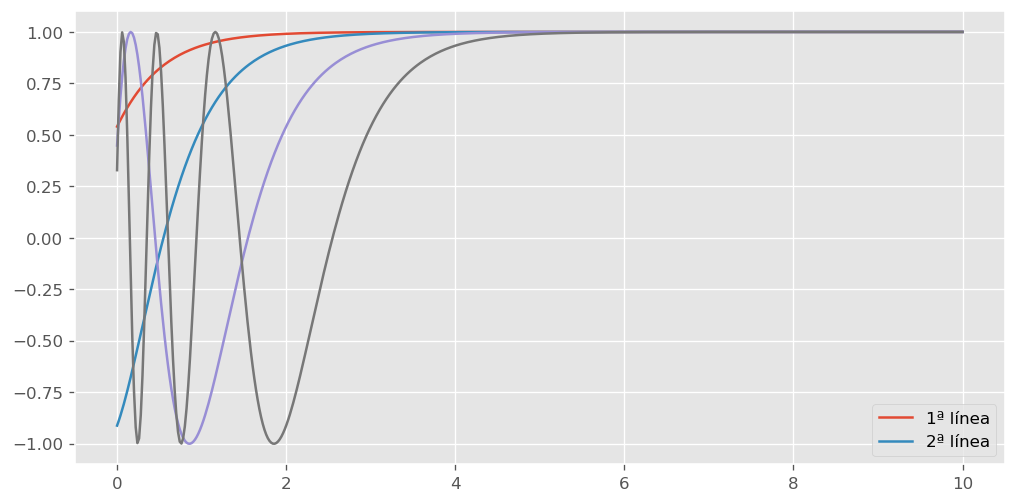

In [10]:
# Generamos un objeto que permite instanciar un gráfico de líneas para estas cuatro columnas.
plt.figure(figsize=(10, 5))
lines = plt.plot(x, np.cos(y))
plt.legend(lines[:2], ["1ª línea", "2ª línea"]);

Vemos pues que hemos forzado a que la leyenda solamente haga referencia a las primeras dos líneas graficadas, dejando las otras dos sin referencia alguna.

A veces, las opciones por defecto en las leyendas no son suficientes para las respectivas visualizaciones de información. Por ejemplo, quizás queramos utilizar el tamaño de los puntos en un gráfico de dispersión para demarcar ciertos atributos de nuestra data y, por extensión, nuestro interés sea que la leyenda muestre aquella información. Para ejemplificar lo anterior, haremos uso de un dataset relativo a la producción anual detallada por punto de extracción en una mina subterránea

**Ejemplo 3.1 - Leyenda asociada al tamaño de puntos:** La ubicación del dataset a utilizar es `datasets/pex_data.xlsx`:

In [11]:
# Accedemos a la data.
data = pd.read_excel("datasets/pex_data.xlsx")

In [12]:
# Mostramos las primeras filas de este DataFrame.
data.head()

,PEX,X,Y,ALT. EXTRAIBLE,PRODUCCION
0,0131H,1622.804335,-4174.759559,179.182548,194.851985
1,0132F,1637.693801,-4181.208870,216.512245,41.559977
2,0132H,1635.052940,-4162.514765,167.983638,202.235380
3,0133F,1649.951066,-4168.959076,215.765651,166.610602
4,0133H,1647.310205,-4150.264971,216.512245,261.675387


Dado que cada uno de los puntos de extracción que constituyen esta mina subterránea se encuentra individualizado por su denominación (que es dependiente de la combinación calle - zanja correspondiente), es una buena práctica indexar este DataFrame con respecto a la columna `"PEX"` de forma previa a construir nuestro gráfico:

In [13]:
# Indexamos nuestra data con respecto al nombre de cada punto de extracción.
data.set_index("PEX", inplace=True)

Vamos a mostrar cuatro dimensiones de información en un gráfico de dispersión, considerando las coordenadas mina de cada punto de extracción como dimensiones espaciales; la altura extraíble será identificada por medio del tamaño de cada punto, y la producción asociada a cada uno se referenciará por medio de su color. Una idea para esto podría ser la siguiente:

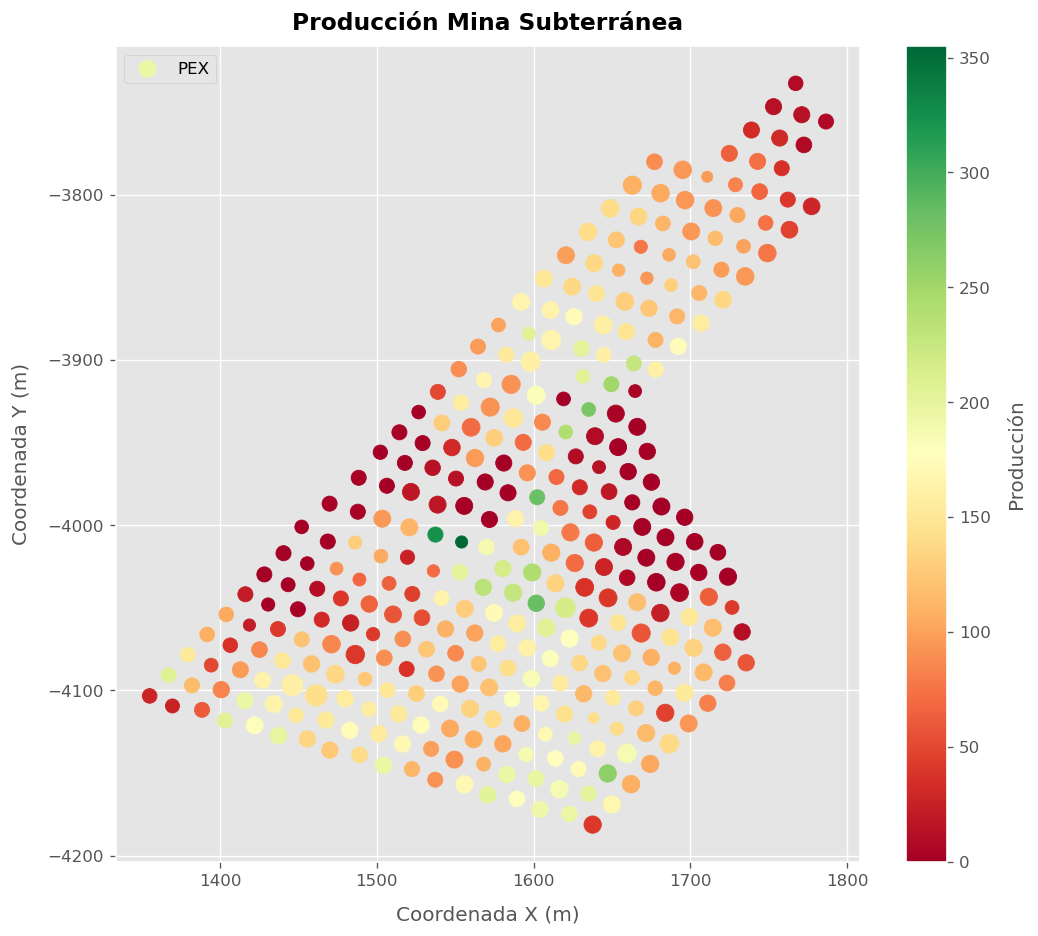

In [14]:
# Una primera aproximación para graficar la data de alturas y producción por cada PEX.
fig, ax = plt.subplots(figsize=(10, 9))
p = ax.scatter(
    x=data["X"], y=data["Y"], s=data["ALT. EXTRAIBLE"]/2, 
    c=data["PRODUCCION"], cmap="RdYlGn", label="PEX"
)
ax.set_xlabel("Coordenada X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Coordenada Y (m)", fontsize=12, labelpad=10)
ax.set_title("Producción Mina Subterránea", fontsize=14, fontweight="bold", pad=10)
cbar = plt.colorbar(p)
cbar.set_label("Producción", fontsize=12, labelpad=10)
ax.legend(loc="upper left");

El gráfico anterior pareciera no tener ningún problema. Sin embargo, la leyenda creada mediante el método `ax.legend()` solamente nos indica que cada punto en este gráfico es, de hecho, un punto de extracción. Pero no tenemos ninguna referencia acerca de los tamaños de cada uno y, por esa razón, no tenemos forma de saber qué significa esa información. Por ello, debemos manipular un poco el método `ax.legend()`, además de referenciar correctamente la información de las alturas extraíbles (que es la data que está siendo representada por el tamaño de cada punto):

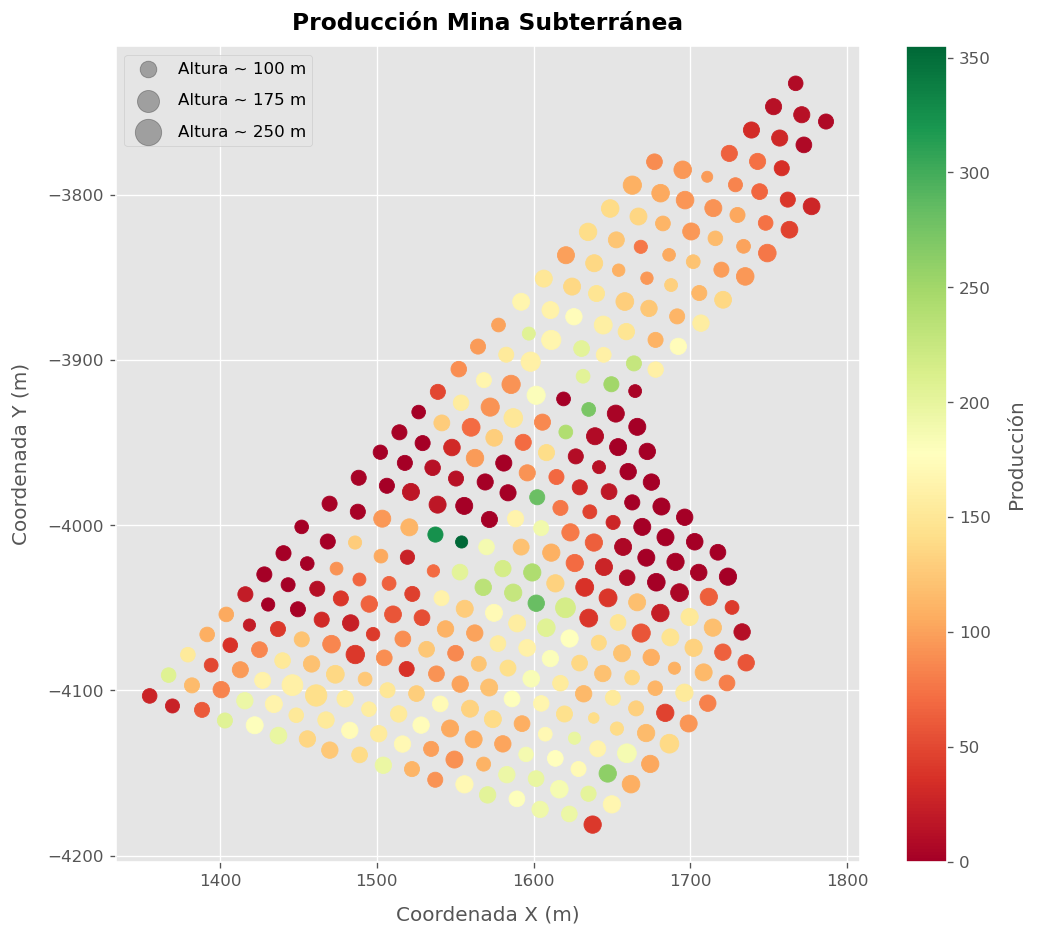

In [15]:
# Una primera aproximación para graficar la data de alturas y producción por cada PEX.
fig, ax = plt.subplots(figsize=(10, 9))
p = ax.scatter(
    x=data["X"], y=data["Y"], s=data["ALT. EXTRAIBLE"]/2, 
    c=data["PRODUCCION"], cmap="RdYlGn"
)
ax.set_xlabel("Coordenada X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Coordenada Y (m)", fontsize=12, labelpad=10)
ax.set_title("Producción Mina Subterránea", fontsize=14, fontweight="bold", pad=10)
cbar = plt.colorbar(p)
cbar.set_label("Producción", fontsize=12, labelpad=10)

# Aquí es donde crearemos la leyenda correcta para este gráfico.
for height_j in [100, 175, 250]:
    ax.scatter([], [], c="k", alpha=0.3, s=height_j, label="Altura ~ "+str(height_j)+" m")
    ax.legend(scatterpoints=1, frameon=True, labelspacing=1);

Y ahora sí nuestra leyenda referencia correctamente la información que queremos comunicar. Para ello, hicimos uso del parámetro `scatterpoints`, que nos permite referenciar a qué gráfico de dispersión apunta la leyenda mostrada en el panel (en este caso, su valor es `1`, porque hace referencia sólo al gráfico vacío definido por la instrucción `ax.scatter([], [], c="k", alpha=0.3, s=height_j, label=str(height_j)+" m")`. Además de ello, usamos el parámetro `labelspacing`, simplemente para especificar cuántas unidades verticales (en magnitud de tamaño de fuente) separan cada entrada de la leyenda. Esta es una forma simple, pero efectiva, de *engañar* a **Matplotlib**.

## Creación de ejes secundarios.
Hasta ahora, hemos tenido el cuidado de aprender paso a paso cómo crear gráficos bidimensionales siempre con el mismo esquema: Usar solamente dos ejes de graficación en una correspondencia uno a uno. No obstante, **Matplotlib** dispone de herramientas que nos permiten aumentar la cantidad de ejes de graficación.

Tomemos el ejemplo de dos ejes verticales que permiten referenciar dos variables dependientes distintas, las cuales se visualizan en términos de su posible correspondencia con una única variable independiente. Vamos a ejemplificar este caso creando algo de data:

In [16]:
# Semilla aleatoria fija.
rng = np.random.default_rng(42)

In [17]:
# Creamos dos variables dependientes.
y1 = rng.normal(loc=1580, scale=220, size=(24, 1)) # Tratamiento de un molino SAG (tph).
y2 = rng.normal(loc=0.9, scale=0.1, size=(24, 1)) # Ley de Cu de entrada a un molino SAG (en %).

In [18]:
# Creamos un índice de fechas y llevamos todo a un DataFrame.
idx = pd.date_range(start="2021-01-01", end="2022-12-31", freq="M")
data = pd.DataFrame(
    data=np.concatenate([y1, y2], axis=1), 
    index=idx, columns=["Tonelaje", "Ley Cu"]
)

In [19]:
# Mostramos las primeras filas de esta DataFrame.
data.head()

,Tonelaje,Ley Cu
2021-01-31,1647.037758,0.857167
2021-02-28,1351.203497,0.864787
2021-03-31,1745.099263,0.953231
2021-04-30,1786.924238,0.936544
2021-05-31,1150.772258,0.941273


Para construir un eje de graficación vertical adicional, debemos *clonar* el eje horizontal del panel respectivo, de tal forma que el nuevo eje vertical estará definido sobre dicho clon del eje horizontal. Para clonar un eje horizontal, debemos trabajar usando la intefaz orientada a objetos, disponiendo de una figura y el panel respectivo asociados a objetos (que, como establecimos al comenzar nuestro viaje por **Matplotlib**), suelen ser `fig` y `ax`, respectivamente. De esta manera, sobre el panel (el objeto `ax`), usamos el método `ax.twinx()` para obtener un clon del eje horizontal definido en ese panel, asignándolo a otro objeto. Veamos esto por medio de un ejemplo:

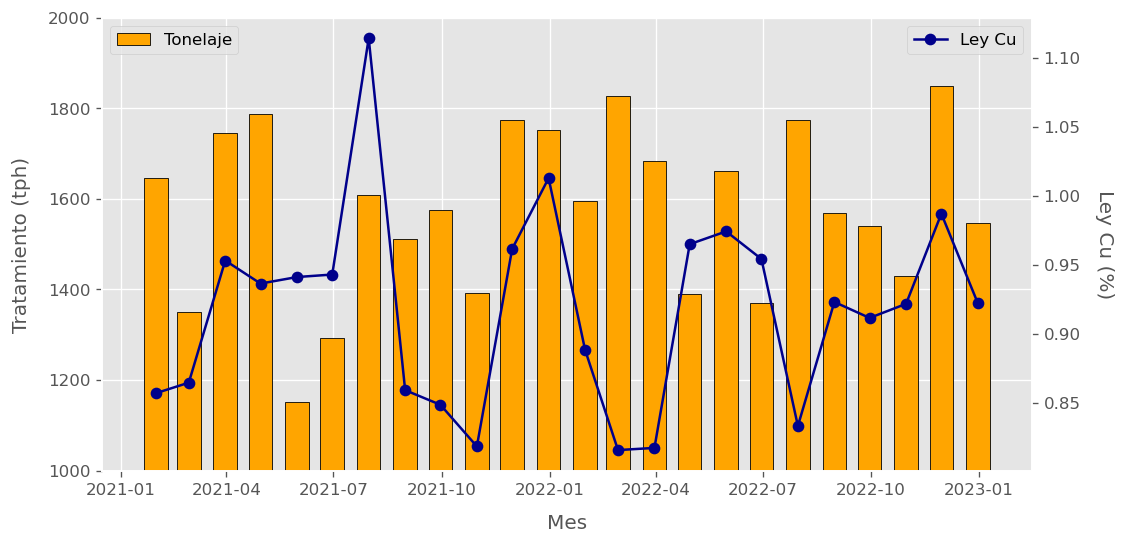

In [20]:
# Un gráfico sencillo con dos ejes verticales asociados a un único eje horizontal.
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx() # Aquí clonamos el eje horizontal.

# El primer gráfico lo dibujamos referido a ax1.
ax1.bar(data.index, data["Tonelaje"], width=20, label="Tonelaje", color="orange", edgecolor="black")

# El segundo gráfico lo dibujamos referido a ax2.
ax2.plot(data.index, data["Ley Cu"], label="Ley Cu", color="darkblue", marker="o")

# Para evitar confusiones, apagamos la grilla de fondo del segundo par de ejes.
ax2.grid(False)

# Y ahora asignamos cada elemento a los pares de ejes correspondientes.
ax1.set_xlabel("Mes", fontsize=12, labelpad=10)
ax1.set_ylabel("Tratamiento (tph)", fontsize=12, labelpad=10)
ax2.set_ylabel("Ley Cu (%)", fontsize=12, labelpad=20, rotation=270)
ax1.set_ylim(1000, 2000)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right");

Todo quedó perfecto, con excepción de la leyenda. Notemos que hay dos leyendas, debido a que cada una de ellas está referida a un panel diferente. Y por lo tanto, se crean dos *frames* distintos. Podemos resolver ésto recuperando cada etiqueta de los gráficos respectivos, concatenándolas y luego asignándolas a la función `ax.legend()`. Para ello usamos el método `get_legend_handles_labels()`, el cual retorna dos objetos: El dibujo del gráfico como tal (que es un objeto que depende del tipo de gráfico; para gráficos de barras, es un objeto del tipo `matplotlib.container.BarContainer`, y para gráficos de líneas, es un objeto del tipo `matplotlib.lines.Line2D`) y las etiquetas que les asignamos a cada uno de ellos mediante el parámetro `label`. Cada uno de estos objetos viene asociado a una lista, por lo que son concatenables. Por lo tanto, sobre cualquiera de los paneles del gráfico, podemos asignar como rótulo de leyenda a la concatenación de cada uno de estos objetos:

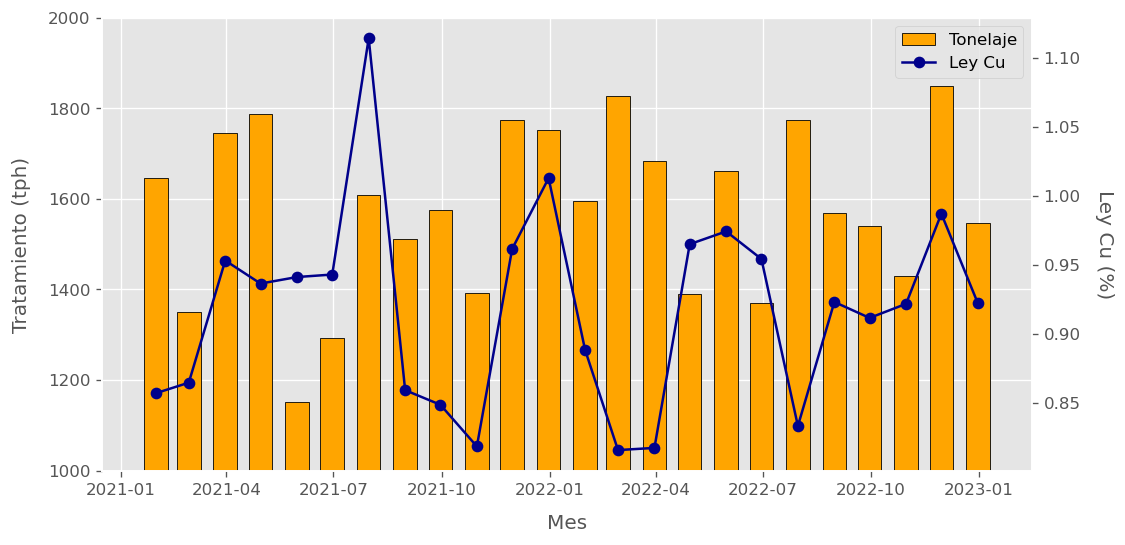

In [21]:
# Lo mismo de antes, pero con la leyenda bien hecha.
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx() # Aquí clonamos el eje horizontal.

# El primer gráfico lo dibujamos referido a ax1.
ax1.bar(data.index, data["Tonelaje"], width=20, label="Tonelaje", color="orange", edgecolor="black")

# El segundo gráfico lo dibujamos referido a ax2.
ax2.plot(data.index, data["Ley Cu"], label="Ley Cu", color="darkblue", marker="o")

# Para evitar confusiones, apagamos la grilla de fondo del segundo par de ejes.
ax2.grid(False)

# Ahora trabajamos la leyenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc=0)

# Y ahora asignamos cada elemento a los pares de ejes correspondientes.
ax1.set_xlabel("Mes", fontsize=12, labelpad=10)
ax1.set_ylabel("Tratamiento (tph)", fontsize=12, labelpad=10)
ax2.set_ylabel("Ley Cu (%)", fontsize=12, labelpad=20, rotation=270)
ax1.set_ylim(1000, 2000);

Y ahí ya quedo perfecto nuestro gráfico.

**Ejemplo 3.2 - Construcción de una curva de tonelaje versus ley:** El archivo `datasets/CuAu210.xlsx` contiene los datos relativos a una sección pequeña del inventario de bloques de un sector de interés adyacente a una mina, denominada *NW-215xxx*, la cual es explotada mediante una operación a cielo abierto y cuyo producto principal es cobre, con un subproducto importante de oro. Cada columna representa un conjunto determinado de bloques del modelo respectivo, y cada fila está referida a la ley de cobre y de oro de cada bloque (en ese orden, hacia abajo).

Vamos a suponer que el área de planificación a largo plazo de esta mina está interesada en determinar rápidamente el potencial económico de este sector, a fin de tomar la decisión de incorporarlo en el Plan Minero a Largo a Plazo (PMLP) de la compañía. Por lo tanto, el paso cero de este análisis es construir una curva de tonelaje versus ley equivalente asociada a este sector, para lo cual disponemos de la información técnico-económica detallada en la Tabla (3.1):

<p style="text-align: center;">Tabla (3.1): Información técnica-económica para este ejercicio</p>

| Parámetro de interés    | Valor | Unidad (si corresponde) |
| :---------------------- | :---- | :---------------------- |
| Precio del cobre        | 380   | cUSS/lb                 | 
| Precio del oro          | 1850  | USS/oz                  |
| Recuperación Cu         | 85    | %                       |
| Recuperación Au         | 78    | %                       |
| Costo mina              | 3.2   | USS/t material          |
| Costo planta            | 12.8  | USS/t mineral           |
| Costo remoción estéril  | 0.92  | USS/t material          |
| Costo venta concentrado | 1.00  | US$/lb Cu procesado     |
| Tasa de descuento       | 16    | %                       |
| Ley de concentrado      | 28    | %                       |

También disponemos de información geométrica necesaria para construir la curva de tonelaje versus ley en la Tabla (3.2).

| Parámetro                      | Valor          | Unidad         |
| :----------------------------- | :------------- | :------------- |
| Dimensión en X                 | 25             | m              |
| Dimensión en Y                 | 25             | m              |
| Dimensión en Z                 | 20             | m              |
| Densidad del mineral (in-situ) | 2.8            | $t/m^{3}$      |

Lo primero es acceder al archivo con el inventario de bloques:

In [22]:
# Accedemos al archivo.
blocks = pd.read_excel("datasets/CuAu210.xlsx")

In [23]:
# Observamos las primeras filas de este archivo.
blocks.head()

,Instancia,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B65,B66,B67,B68,B69,B70,B71,B72,B73,B74
0,Cu_1,0.098,0.085,0.108,0.111,0.105,0.087,0.093,0.099,0.098,...,0.105,0.094,0.113,0.098,0.108,0.099,0.094,0.098,0.100,0.097
1,Au_1,0.075,0.241,0.280,0.394,0.142,0.123,0.115,0.438,0.367,...,0.106,0.196,0.075,0.230,0.357,0.137,0.285,0.159,0.258,0.393
2,Cu_2,0.099,0.102,0.089,0.094,0.093,0.093,0.109,0.103,0.090,...,0.094,0.104,0.099,0.099,0.102,0.100,0.083,0.102,0.094,0.094
3,Au_2,0.565,0.156,0.270,0.433,0.114,0.096,0.228,0.142,0.153,...,0.133,0.142,0.154,0.257,0.126,0.199,0.145,0.311,0.179,0.370
4,Cu_3,0.110,0.103,0.083,0.103,0.103,0.098,0.089,0.125,0.112,...,0.097,0.097,0.086,0.100,0.100,0.096,0.099,0.095,0.098,0.094


Ahora indexamos nuestro inventario conforme las instancias definidas en la primera columna de la base de datos. Esto es importante, ya que la construcción de las curvas de tonelaje vs ley requiere de individualizar cada elemento por bloque:

In [24]:
# Indexamos este DataFrame respecto de cada identificador de fila del inventario.
blocks.set_index("Instancia", inplace=True)

Ahora separamos cada una de las instancias que dan cuenta de las leyes de mineral, a fin de facilitar nuestro trabajo. También visualizaremos las leyes mediante un histograma, de manera que podamos tener una idea de la distribución de las leyes de este cuerpo mineralizado:

In [25]:
# Separación de las leyes de cada bloque por elemento de interés.
blocks_cu = blocks.loc[[f"Cu_{j}" for j in range(1, len(blocks)//2 + 1)]]
blocks_au = blocks.loc[[f"Au_{j}" for j in range(1, len(blocks)//2 + 1)]]

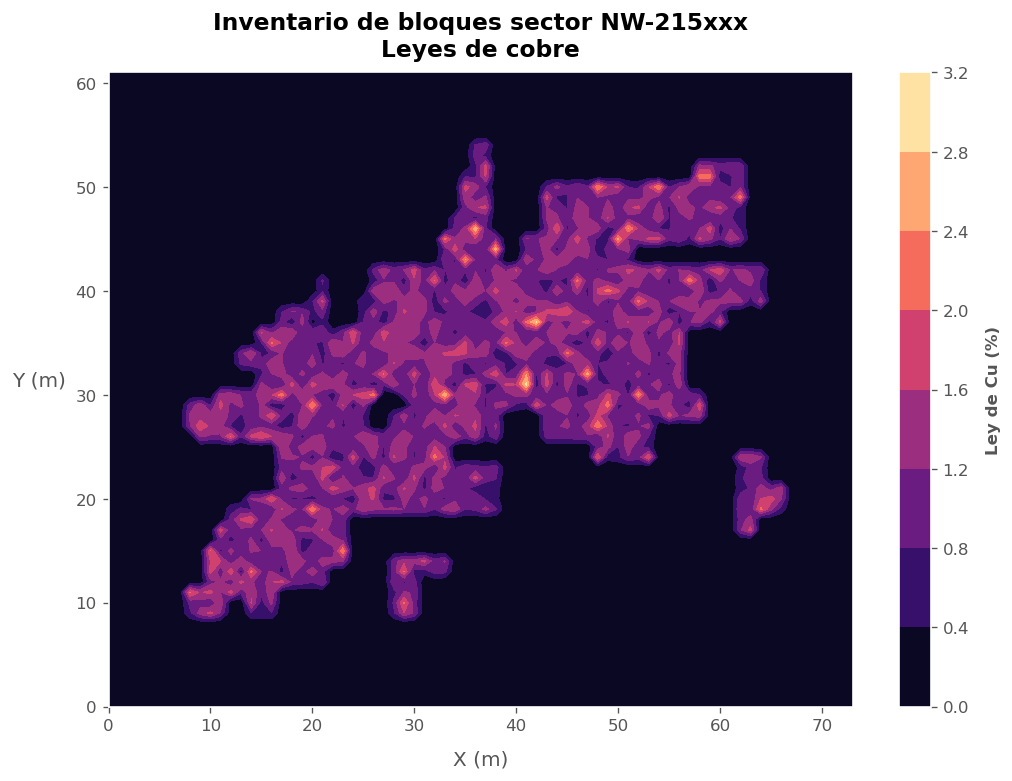

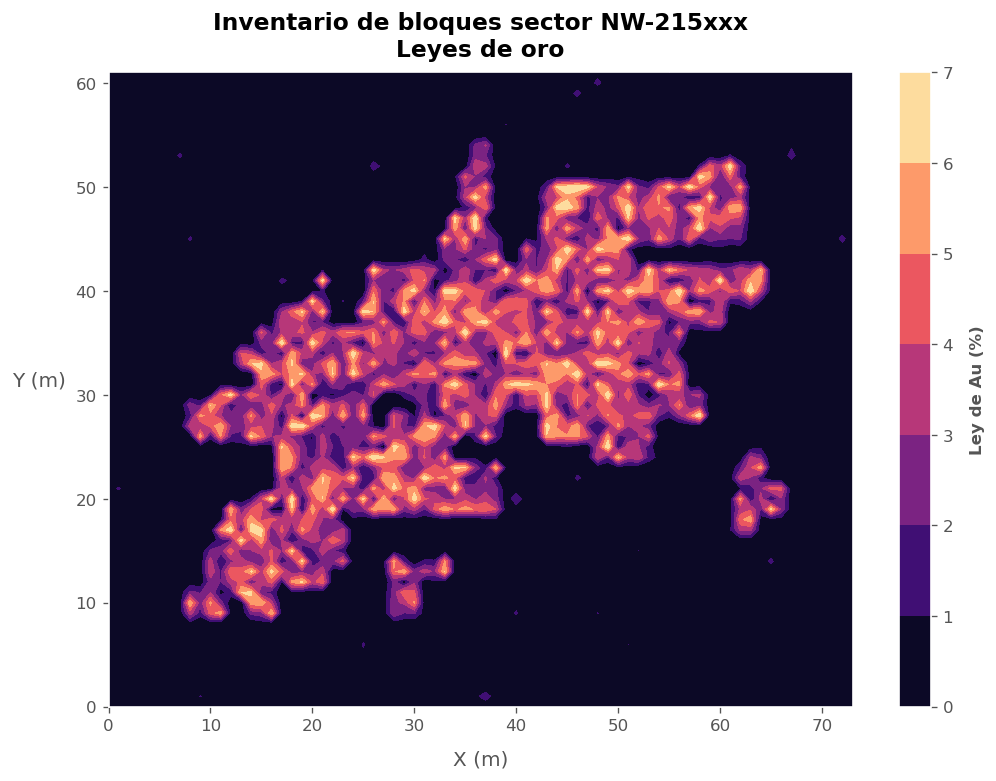

In [48]:
# Visualización rápida de estos inventarios de bloques mediante un histograma.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(blocks_cu.values, cmap="magma")
ax.set_xlabel("X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Y (m)", fontsize=12, labelpad=22, rotation=0)
ax.set_title(
    "Inventario de bloques sector NW-215xxx\nLeyes de cobre", 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Ley de Cu (%)", fontsize=10, fontweight="bold", labelpad=10);

fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(blocks_au.values, cmap="magma")
ax.set_xlabel("X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Y (m)", fontsize=12, labelpad=22, rotation=0)
ax.set_title(
    "Inventario de bloques sector NW-215xxx\nLeyes de oro", 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Ley de Au (%)", fontsize=10, fontweight="bold", labelpad=10);